In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
df = pd.read_csv("jap_eng_common_long.csv")
print(df.shape)
df.head(10)

(2434, 9)


,Unnamed: 0,word,kanji,reading,overall_rank,rank_english,rank_japanese,count_english,word_type_japanese
0,0,you,あなた,あなた,1,15,104,2996181025,pronoun
1,1,you,君,きみ,2,15,1834,2996181025,noun
2,2,new,新しい,あたらしい,3,27,638,1551258643,adjective
3,3,more,もっと,もっと,4,28,85,1544771673,adverb
4,4,we,私たち,わたしたち,5,31,262,1390661912,pronoun
5,5,we,我々,われわれ,6,31,5012,1390661912,noun
6,6,page,ページ,ぺーじ,7,38,851,1082121730,noun
7,7,search,検索,けんさく,8,41,4428,1024093118,verbal noun
8,8,free,ただ,ただ,9,42,310,1014107316,noun
9,9,one,一,いち,10,45,2,993536631,noun


In [19]:
df["word_kanji"] = df["word"] + " - " + df["kanji"]
df["rel_rank_english"] = df["rank_english"]/333333
df["rel_rank_japanese"] = df["rank_japanese"]/10000

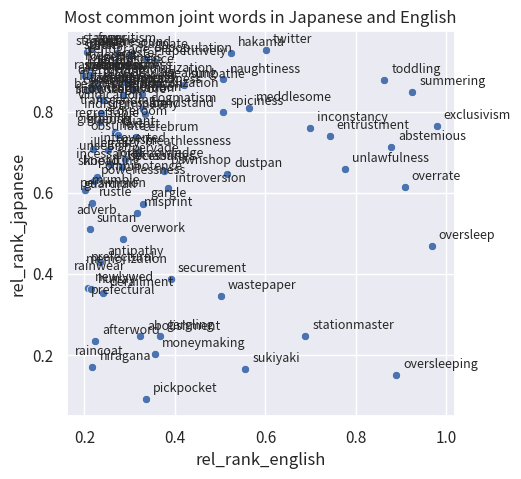

In [20]:
figs, ax = plt.subplots(figsize=(5, 5))
sns.set(font='Noto Sans CJK JP')
sns.scatterplot(df[df["rel_rank_english"] > 0.2], x="rel_rank_english", y="rel_rank_japanese")
ax.set_title("Most common joint words in Japanese and English")

# Add labels to points
for i, row in df.iterrows():
    ax.annotate(
        row["word"], 
        (row["rel_rank_english"], row["rel_rank_japanese"]), 
        textcoords="offset points", 
        xytext=(5,5),  # Offset to avoid overlap with the point
        ha='left',
        fontsize=9
    )

Text(0.5, 1.0, 'Most common joint words in Japanese and English')

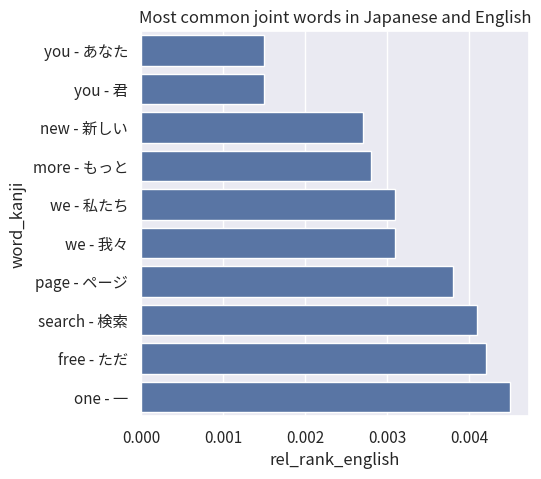

In [145]:
figs, ax = plt.subplots(figsize=(5, 5))
sns.set(font='Noto Sans CJK JP')
sns.barplot(df[["word_kanji", "rel_rank_english", "rel_rank_japanese"]].head(10), y="word_kanji", x="rel_rank_english")
ax.set_title("Most common joint words in Japanese and English")

In [76]:
def create_rank_difference_df(df):
    df["rank_difference"] = df["rank_english"] - df["rank_japanese"]
    df["rank_difference_reversed"]= df["rank_difference"]*-1
    df["rank_difference_abs"] = df["rank_difference"].abs()
    df.sort_values(by=["rank_difference_reversed"], ascending=True, inplace=True)
    return df

In [78]:
rank_difference_df = create_rank_difference_df(df)
rank_difference_df.head(10)

,Unnamed: 0,word,kanji,reading,overall_rank,rank_english,rank_japanese,count_english,word_type_japanese,rank_difference,rank_difference_abs,rank_difference_reversed
1617,1617,tooth,歯,は,1618,9414,1198,5551049,noun,8216,8216,-8216
1615,1615,banana,バナナ,ばなな,1616,9397,1297,5567941,noun,8100,8100,-8100
1555,1555,potato,ジャガイモ,じゃがいも,1556,8549,487,6397517,noun,8062,8062,-8062
1620,1620,freeze,凍る,こおる,1621,9443,1419,5526731,verb,8024,8024,-8024
1515,1515,shade,日陰,ひかげ,1516,8025,56,6996835,noun,7969,7969,-7969
1608,1608,tomato,トマト,とまと,1609,9324,1405,5630352,noun,7919,7919,-7919
1603,1603,refrigerator,冷蔵庫,れいぞうこ,1604,9208,1416,5726901,noun,7792,7792,-7792
1612,1612,tear,涙,なみだ,1613,9356,1635,5605530,noun,7721,7721,-7721
1627,1627,blanket,毛布,もうふ,1628,9523,1851,5457762,noun,7672,7672,-7672
1619,1619,pencil,鉛筆,えんぴつ,1620,9442,1843,5527529,noun,7599,7599,-7599


In [67]:
rank_difference_df.tail()

,Unnamed: 0,word,kanji,reading,overall_rank,rank_english,rank_japanese,count_english,word_type_japanese,rank_difference,rank_difference_abs
709,709,opening,開き,あき,710,2265,2255,35538225,noun,10,10
1553,1553,slope,斜面,しゃめん,1554,8479,8473,6469975,NaN,6,6
902,902,unlimited,無制限,むせいげん,903,3223,3229,23794930,adjectival noun,-6,6
47,47,go,行く,いく,48,123,120,421086358,verb,3,3
370,370,speed,速さ,はやさ,371,969,968,83135749,noun,1,1


In [70]:
def create_rank_difference_focus_df(df):
    df.drop_duplicates(inplace=True)
    rank_cutoff = np.min([df["rank_english"].max(), df["rank_japanese"].max()])
    #print("rank cutoff", rank_cutoff)
    df.drop(df[df["rank_english"] > rank_cutoff].index, inplace=True)
    df.drop(df[df["rank_japanese"] > rank_cutoff].index, inplace=True)
    df["rank_difference"] = (df["rank_english"] - df["rank_japanese"])*-1
    df["rank_difference_abs"] = df["rank_difference"].abs()
    df.sort_values(by=["rank_difference"], ascending=True, inplace=True)
    return df

In [71]:
rank_difference_focus_df = create_rank_difference_focus_df(df)
rank_difference_focus_df.head()

,Unnamed: 0,word,kanji,reading,overall_rank,rank_english,rank_japanese,count_english,word_type_japanese,rank_difference,rank_difference_abs
1617,1617,tooth,歯,は,1618,9414,1198,5551049,noun,-8216,8216
1615,1615,banana,バナナ,ばなな,1616,9397,1297,5567941,noun,-8100,8100
1555,1555,potato,ジャガイモ,じゃがいも,1556,8549,487,6397517,noun,-8062,8062
1620,1620,freeze,凍る,こおる,1621,9443,1419,5526731,verb,-8024,8024
1515,1515,shade,日陰,ひかげ,1516,8025,56,6996835,noun,-7969,7969


In [66]:
rank_difference_focus_df.tail()

,Unnamed: 0,word,kanji,reading,overall_rank,rank_english,rank_japanese,count_english,word_type_japanese,rank_difference,rank_difference_abs
709,709,opening,開き,あき,710,2265,2255,35538225,noun,10,10
1553,1553,slope,斜面,しゃめん,1554,8479,8473,6469975,NaN,6,6
902,902,unlimited,無制限,むせいげん,903,3223,3229,23794930,adjectival noun,-6,6
47,47,go,行く,いく,48,123,120,421086358,verb,3,3
370,370,speed,速さ,はやさ,371,969,968,83135749,noun,1,1
